In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.2661   | 2.291     | 5.535     | 3.77      |
| 12        | -0.247    | 1.738     | 6.502     | 2.577     |
| 14        | -0.2467   | 1.829     | 7.434     | 2.222     |
| 27        | -0.2255   | 1.27      | 8.508     | 9.375     |
| 36        | -0.2133   | 0.5831    | 3.103     | 2.463     |
| 42        | -0.2      | 0.01      | 3.805     | 3.819     |
| 46        | -0.1998   | 0.01      | 10.0      | 3.387     |
| 61        | -0.1981   | 0.01      | 8.273     | 2.772     |
| 85        | -0.1942   | 0.01      | 9.393     | 2.519     |
| 96        | -0.1392   | 0.01      | 8.771     | 1.859     |
| 97        | -0.04986  | 0.118     | 8.37      | 0.7263    |
| 105       | -0.03285  | 0.6107    | 8.625     | 0.4771    |
| 114       | -0.01843  | 0.4597    | 8.486     | 0.5046    |
Curve params found
{'push': 0.4597497971442725,
 'shift': 8.4862035138

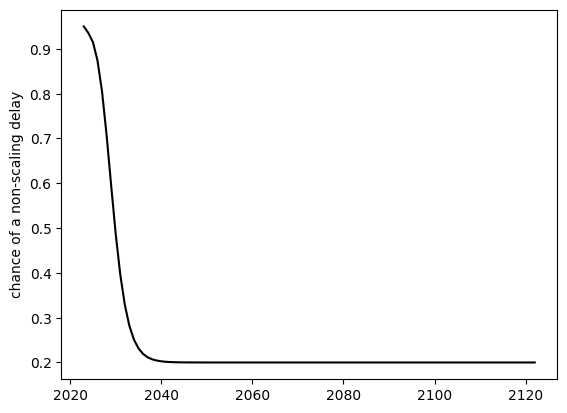

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 94%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 87%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 71%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 49%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.8),
                     (2030, 0.5),
                     (2035, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(3, 10)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.3572   | 3.048     | 6.575     | 1.004     |
| 4         | -0.2589   | 0.6888    | 8.237     | 2.806     |
| 14        | -0.1966   | 1.4       | 6.029     | 0.4834    |
| 45        | -0.141    | 0.9903    | 6.314     | 0.5035    |
| 46        | -0.07253  | 0.3837    | 6.515     | 0.5336    |
| 52        | -0.01851  | 0.01      | 6.94      | 1.21      |
| 54        | -0.01014  | 0.02871   | 7.391     | 1.051     |
Curve params found
{'push': 0.02870516320772882,
 'shift': 7.390702985392663,
 'slope': 1.051133539363381}
-
## Chance of nonscaling delay ##


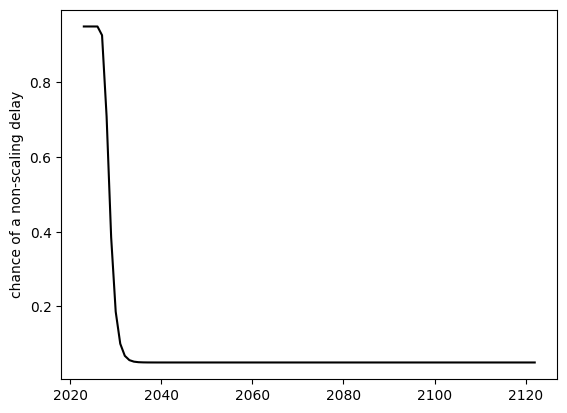

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 93%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 71%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 39%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2033 

In [3]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1699   | 4.989     | 5.36      | 4.69      |
| 3         | -0.145    | 3.624     | 7.439     | 0.5283    |
| 27        | -0.08537  | 0.9249    | 9.923     | 6.015     |
| 40        | -0.07537  | 0.3213    | 5.712     | 6.495     |
| 41        | -0.075    | 0.01      | 8.039     | 8.744     |
| 42        | -0.075    | 0.01      | 10.0      | 2.774     |
| 68        | -0.07499  | 0.01      | 4.725     | 2.254     |
Curve params found
{'push': 0.01, 'shift': 4.724646278421532, 'slope': 2.254299269057994}
-
## Chance of nonscaling delay ##


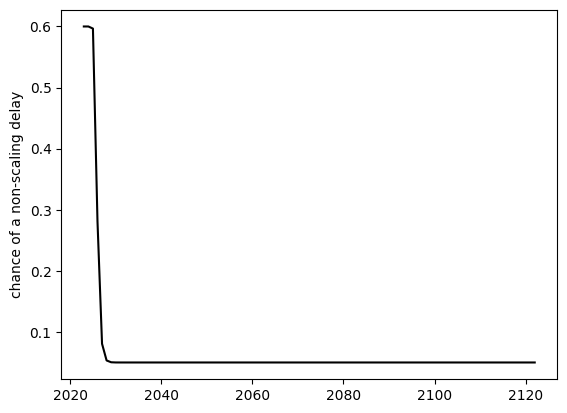

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - cha

In [4]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.09603  | 6.464     | 6.223     | 4.437     |
| 3         | -0.07742  | 1.865     | 3.65      | 2.23      |
| 8         | -0.03561  | 0.4445    | 5.581     | 0.5349    |
| 41        | -0.03356  | 0.1183    | 7.282     | 0.2968    |
| 74        | -0.02557  | 0.1049    | 7.343     | 0.3406    |
| 76        | -0.01232  | 0.406     | 5.65      | 0.3512    |
| 80        | -0.01177  | 0.5598    | 5.634     | 0.2987    |
Curve params found
{'push': 0.5597961138324161,
 'shift': 5.634140293368801,
 'slope': 0.29874737872264}
-
## Chance of nonscaling delay ##


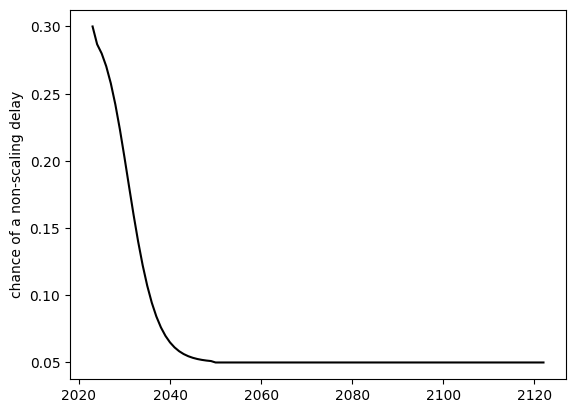

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2033

In [5]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(4, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.02425  | 1.548     | 8.894     | 6.515     |
| 7         | -0.0193   | 0.8424    | 6.551     | 0.9268    |
| 14        | -0.01809  | 0.5315    | 4.318     | 1.399     |
| 30        | -0.01667  | 0.2416    | 7.261     | 9.338     |
| 42        | -0.01667  | 0.01      | 3.553     | 2.884     |
| 43        | -0.01664  | 0.01      | 7.498     | 1.967     |
| 52        | -0.01659  | 0.01      | 10.0      | 0.7248    |
| 58        | -0.01651  | 0.01      | 2.555     | 1.561     |
| 74        | -0.01623  | 0.01      | 9.177     | 1.592     |
| 94        | -0.01467  | 0.07639   | 7.375     | 1.05      |
Curve params found
{'push': 0.07638621653553151,
 'shift': 7.375081449953892,
 'slope': 1.0500565558145225}
-
## Chance of nonscaling delay ##


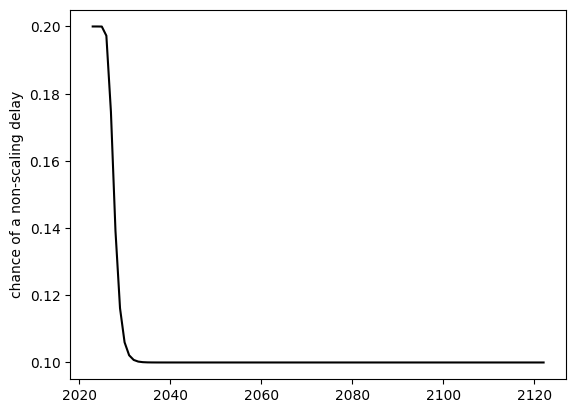

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [6]:
nonscaling_points = [(2023, 0.2),
                     (2030, 0.15),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.6, sq.lognorm(3, 10)],
                                                                                   [0.4, sq.lognorm(10, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 28        | -0.1001   | 0.06192   | 0.6156    | 9.683     |
| 38        | -0.1      | 0.06542   | 1.915     | 4.432     |
| 41        | -0.1      | 0.01      | 1.37      | 10.0      |
| 42        | -0.1      | 0.01      | 3.071     | 4.495     |
| 44        | -0.1      | 0.01      | 7.042     | 3.776     |
| 45        | -0.1      | 0.01      | 5.206     | 3.357     |
| 55        | -0.06299  | 0.06105   | 4.114     | 0.4694    |
| 106       | -0.03364  | 0.09268   | 4.283     | 0.5824    |
| 109       | -0.03104  | 0.0549    | 4.259     | 0.6112    |
Curve params found
{'push': 0.05489648471901013,
 'shift': 4.25940984095582,
 'slope': 0.6112200712017335}
-
## Chance of nonscaling delay ##


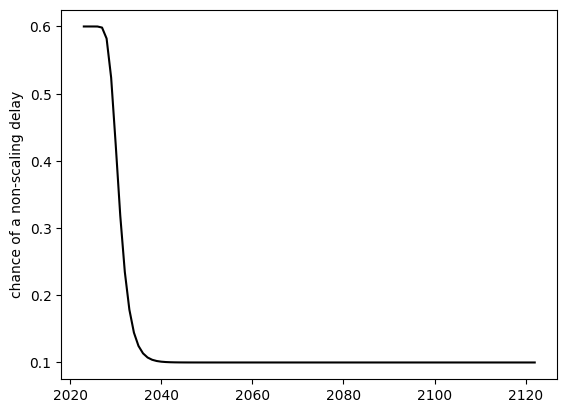

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 52%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 42%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.4),
                     (2050, 0.2),
                     (2080, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.95, sq.lognorm(1, 5)],
                                                                            [0.05, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Save

In [8]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
